# **Neural Network Detection of Pneumonia in Chest Radiographs**

__Author: Spencer Hadel__
***
## The Problem

According to the World Health Organization, __pneumonia accounts for 14% of all deaths of children under 5 years old, killing 740,180 children in 2019.__
Also according to the WHO, pneumonia __can be prevented but only one third of children who have it receive the antibiotics they need.__ More information [can be found here](https://www.who.int/news-room/fact-sheets/detail/pneumonia).

A new artificial intelligence based medical research company, **Medecins Sans Limites (MSL)**, has launched a number of initiatives to create Neural Networks which aid the globe in solving crises like this one. The current project aims to accurately predict pneumonia based on chest radiography. 

***
## The Solution

The diagnosis of pneumonia requires a highly trained medical professional, as well as a variety of lab tests and a deep analysis of the patient's medical history and other symptoms. *MSL* does not aim to replace every step of the medical diagnosis process, as the human element of understanding other facts about a patient still remain. The objective is to create a highly accurate and sensitive model that can help medical professionals identify cases they need to treat based on the x-rays. 

This will be particularly useful in developing nations and parts of the world where circumstances inhibit access trained medical staff or equipment. If successful, it also stands to aid areas with full access to medical care, either providing a second opinion or helping confirm medical diagnoses.

***

## Data

The [data for this project is from this source on kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia), and states the following: 

"Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care."

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

According to the source of the data:

*"all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert."* 

The Data consists of __5,863 Chest X-Rays of patients 1-5 years old__. This consists of __1583 x-rays of patients labeled 'NORMAL', and 4,280 x-rays of patients labeled 'PNEUMONIA'.__ Throughout this project, the data will be used to create __training, validation, and test datasets__ in order to build models that can predict outcomes.

The first step this analysis takes is to create image data generators, which create useable train, test, and validation datasets. Each of these datasets contained 2 classes, **0 and 1** denoting whether the image showed a case labeled as **NORMAL or PNEUMONIA**, respectively.
***
## Methods

This project creates multiple **Convolutional Neural Networks** in order to create a high performing **Binary Classification Model** for identifying patients with and without pneumonia.

An important thing to observe in each model is the performance throughout epochs, particularly the *Accuracy and Loss* of both the *Training and Validation* data throughout the training process of each model.

We also use *Confusion Marices* to show each model's predictions on the test data for each iteration of the project. This shows how many times a given model makes each prediction (0 or 1, since this is a binary classification problem), and whether that prediction matches the actual label of the image.

Additionally, we use certain metrics to identify how effective each model was when making predicitons on the test data, iterating on each successful outcome.

> * Binary Accuracy: Accuracy is of course, important. It will tell us how well our model successfully predicts cases of pneumonia. Ideally, we will always want our accuracy score to go up. Without an accurate model, there is no valuable outcome for this analysis. Binary accuracy is a built in keras metric used specifically for binary classification problems like this one.
> * Loss: The Loss of each model can be observed in the model.fit phase of the analysis. This metric will be a rough understanding of how our model is performing. Ideally, loss will get smaller throughout training epochs as well as throughout the iterative modeling process.

The following two metrics are important when testing each model's performance on the test data:
> * Recall (a.k.a. Sensitivity): __Recall is crucial__ in this analysis, particularly when evaluating our model against the test data. This metric will show us our model's ability to __avoid False Negatives__, or in other words to __prevent misdiagnosing someone as healthy when in reality they are ill__. 
> * Precision: Our final significant metric explains how many of the Predicted Positives of our model are correct. This is important to avoid misdiagnosing a patient as ill, but is also less crucial than the other metrics as the primary goal is to help people in need.

Throughout the iterative process, we implemented various methodologies.

One method in particular was the *Data Augmentation* on the training data, which alters the images to train our model on more general features of the data instead of overfitting on specifics that would be harmful to its performance. 
***
***

# Perparation and EDA


In [3]:
#basic imports
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import datetime
import glob

#keras for images
import tensorflow as tf
from keras.optimizers import SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import preprocessing

#maintain reproducible results for this analysis:
np.random.seed(42)
tf.random.set_seed(42)

The data from kaggle is separated into 3 folders (train, test, and validation). Each of these folders contains two folders, labeled normal and pneumonia. We can easily retrieve the data from each of these folders and subfolders and separate them into three different datasets with two different classes (normal and pneumonia).

__Significance of Train, Test, and Validation Sets__

The Training Set is what our Deep Learning Models will be trained on, with the Validation Set used in that process in order to measure how the models perform at various epochs throughout the training process. Finally, the Test Set will be what we use to measure each model's performance on a new set of data that it has not seen in the training process.


In [5]:
#directories for loading data

train_dir = 'data/kaggle--chest_xray/train'
test_dir = 'data/kaggle--chest_xray/test'
val_dir = 'data/kaggle--chest_xray/val'


# All images will be rescaled by 1./255

#explain size

#explain class_mode

#explain what this code does

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_data = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        seed = 42,
        #binary classification problem:
        class_mode='binary')


#set shuffle to false for val and test data!

val_data = val_datagen.flow_from_directory(
        val_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        seed = 42,
        shuffle= False,
        #binary classification problem:
        class_mode='binary')

test_data = test_datagen.flow_from_directory(
        test_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        seed = 42,
        shuffle = False,
        #binary classification problem:
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


We successfully created datsets for train, test, and val!

Next let's check what the "2 classes" in this data are:

In [3]:
#identify class labels in data
train_data.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

We can see that 'NORMAL' is class 0 and 'PNEUMONIA' is class 1. 

If we were to count the image files in the data folders, we could see that there are 1341 images in the training dataset in the NORMAL subfolder, and 3875 images in the PNEUMONIA subfolder. Our next step is to quickly verify that our data in the notebook matches these results, as well as those in the test and val folders:

In [4]:
from collections import Counter

train_counter = Counter(train_data.classes)    
test_counter = Counter(test_data.classes)    
val_counter = Counter(val_data.classes)    

#train:
print('Train:')
print('NORMAL: ', train_counter[0])
print('PNEUMONIA: ', train_counter[1])
print('')

#test:
print('Test:')
print('NORMAL: ', test_counter[0])
print('PNEUMONIA: ', test_counter[1])
print('')

#val:
print('Validation:')
print('NORMAL: ', val_counter[0])
print('PNEUMONIA: ', val_counter[1])
print('')

Train:
NORMAL:  1341
PNEUMONIA:  3875

Test:
NORMAL:  234
PNEUMONIA:  390

Validation:
NORMAL:  8
PNEUMONIA:  8



These numbers do in fact line up! Let's also get a better understanding of how that data is balanced:

In [5]:
#print percentage of NORMAL results in each set
train_norm_percent = train_counter[0]/(train_counter[0]+train_counter[1])
test_norm_percent = test_counter[0]/(test_counter[0]+test_counter[1])
val_norm_percent = val_counter[0]/(val_counter[0]+val_counter[1])

print('Percent NORMAL in train: {0:.0%}'.format(train_norm_percent))
print('Percent NORMAL in test: {0:.0%}'.format(test_norm_percent))
print('Percent NORMAL in val: {0:.0%}'.format(val_norm_percent))

Percent NORMAL in train: 26%
Percent NORMAL in test: 38%
Percent NORMAL in val: 50%


So the data is most imbalanced in the train, less so in test, and not at all imbalanced in val. That being said, the data is never drastically imbalanced, and there are still plenty of each of the two classes in the train dataset to create successful models with.

### Observing the Images

Our next step is to analyze what this image data actually contains!

We'll use the images in the validation folder for examples of NORMAL and PNEUMONIA classes.

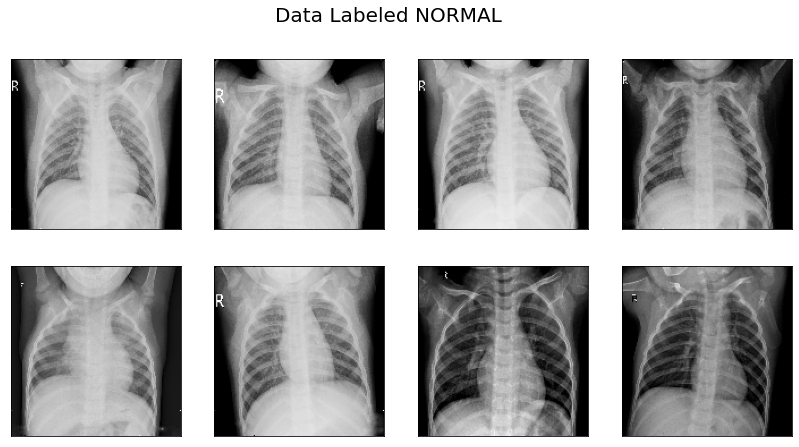

In [6]:
#collect only images where label is 0 (NORMAL)
norm_imgs = val_data[0][0][val_data[0][1]==0]
normal_fig,normal_ax = plt.subplots(2,4,figsize=(14,7))

for idx,image in enumerate(norm_imgs[:8]):
        active_axis = normal_ax[idx//4][idx%4]
        active_axis.imshow(image)
        active_axis.set_xticks([])
        active_axis.set_yticks([])
normal_fig.suptitle('Data Labeled NORMAL', fontsize=20);

normal_fig.savefig('./img/0-normal_xrays.png')

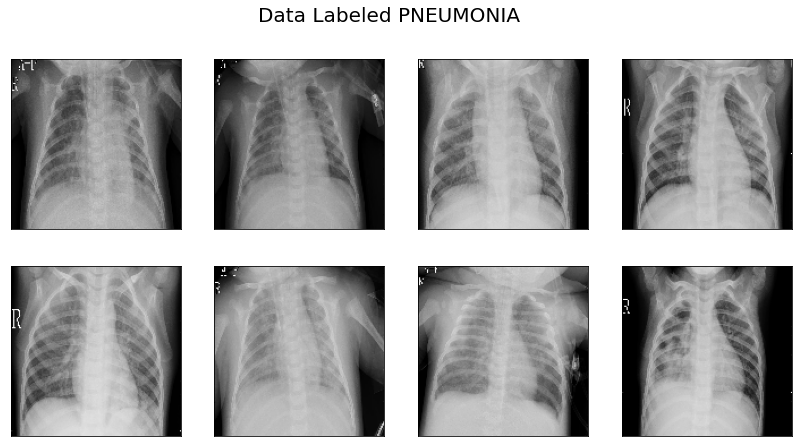

In [7]:
#collect only images where label is 1 (PNEUMONIA)
pneum_imgs = val_data[0][0][val_data[0][1]==1]
pneum_fig,normal_ax = plt.subplots(2,4,figsize=(14,7))

for idx,image in enumerate(pneum_imgs[:8]):
        active_axis = normal_ax[idx//4][idx%4]
        active_axis.imshow(image)
        active_axis.set_xticks([])
        active_axis.set_yticks([])
pneum_fig.suptitle('Data Labeled PNEUMONIA', fontsize=20);

pneum_fig.savefig('./img/0-pneum_xrays.png')

__Interpretation of these Images__

It's clear that to an untrained medical eye, the two groups contain very similar images. A few of the X-Rays in the pneumonia set may be identifiably different than those in the normal set, but it would by no means be easy to instinctively differentiate betweenn the two sets if a random image was flashed on the screen. 

This is why we will attempt to create a Neural Network that will identify the differences in ways out human eyes and brains cannot.

# Modeling the Data

In [18]:
#import necessary modeling and evaluating modules
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, regularizers
from tensorflow.keras import activations
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras import optimizers
from keras import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

### Metrics

When building these models, a few different evaluation metrics are significant in various instances. 

> * Binary Accuracy: Accuracy is of course, important. It will tell us how well our model successfully predicts cases of pneumonia. Ideally, we will always want our accuracy score to go up. Without an accurate model, there is no valuable outcome for this analysis. Binary accuracy is a built in keras metric used specifically for binary classification problems like this one.
> * Loss: The Loss of each model can be observed in the model.fit phase of the analysis. This metric will be a rough understanding of how our model is performing. Ideally, loss will get smaller throughout training epochs as well as throughout the iterative modeling process.

The following two metrics are important when testing each model's performance on the test data:
> * Recall (a.k.a. Sensitivity): __Recall is crucial__ in this analysis, particularly when evaluating our model against the test data. This metric will show us our model's ability to __avoid False Negatives__, or in other words to __prevent misdiagnosing someone as healthy when in reality they are ill__. 
> * Precision: Our final significant metric explains how many of the Predicted Positives of our model are correct. This is important to avoid misdiagnosing a patient as ill, but is also less crucial than the other metrics as the primary goal is to help people in need.



In [9]:
my_metrics = [metrics.BinaryAccuracy(),
              metrics.Precision(),
                metrics.Recall()]

In [10]:
#create dataframe for storing scores

df_model_scores = pd.DataFrame(columns = ['Model Name', 'Accuracy', 'Loss', 'Precision', 'Recall'])
# print(df_model_scores)

***
## Baseline Convolutional Model

### Designing the Model

The general construction of our baseline model will be as follows:

__Loss__ - For this analysis, since we are creating a binary classification model, we will be using Binary Cross-Entropy as our loss function.

__Optimizer__ - We will also begin our analysis with one of the standard optimizers for binary classification, Stochastic Gradient Descent (SGD).

__Sequential Model:__ Since we are creating a binary classification model that only needs one layer for inputs and one layer for outputs, we  will create a Sequential Model.

__ReLu Activation:__ We will be using the Rectified Linear Unit (ReLu) activation function on our layers. This is standard and used for high performance computation.

__Convolutional Layers(2D):__ Since we are identfying features of images, we will use 2D Convolutional Layers to detect significant features of each image to train our models.

__Max Pooling Layer(2D):__ The Max Pooling Layer downsamples the layer before it, in order to create a summary of the convolutional patterns before it. This improves execution time during the training of our model.

__Flatten:__ We apply a Flattening layer to convert our multidimensional arrays into one continuous vector.

__Dense:__ Standard neural network layer, which receives input to every neuron in the layer from every neuron int the previous layer (hence the name "Dense").

__Sigmoid Output:__ The model ends with a Sigmoid output layer, which transforms the calculations of the previous layers into a probability of the outcome being one of the two binary classes. This is standard for our binary classification setup.

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

#sigmoid output
model.add(layers.Dense(1, activation='sigmoid'))


#compile
model.compile(
    #stochastic gradient descent optimizer:
    optimizer='sgd',
    
    #binar crossentropy loss:
    loss='binary_crossentropy',
    
    #metrics
    metrics=[my_metrics]
    )

#summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

### Training

In [12]:
#track time model takes
start = datetime.datetime.now()

history = model.fit(
    train_data,
    epochs=30,
     #fit to validation data
    validation_data=val_data,
    batch_size = 32
)

#display time taken
end = datetime.datetime.now()
print('Training Time: ',end-start)

Epoch 1/30
163/163 [==============================] - 118s 717ms/step - loss: 0.5472 - binary_accuracy: 0.7469 - precision: 0.7517 - recall: 0.9845 - val_loss: 0.9363 - val_binary_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/30
163/163 [==============================] - 119s 730ms/step - loss: 0.4012 - binary_accuracy: 0.8265 - precision: 0.8436 - recall: 0.9409 - val_loss: 0.6647 - val_binary_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/30
163/163 [==============================] - 118s 724ms/step - loss: 0.2575 - binary_accuracy: 0.9018 - precision: 0.9205 - recall: 0.9499 - val_loss: 0.6723 - val_binary_accuracy: 0.6875 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 4/30
163/163 [==============================] - 138s 846ms/step - loss: 0.1985 - binary_accuracy: 0.9208 - precision: 0.9398 - recall: 0.9546 - val_loss: 0.8088 - val_binary_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 5/30
163/163 [============

### Evaluating

Now that the model has finished fitting to the data , we can start by visualizing its accuracy and loss throughout each epoch:

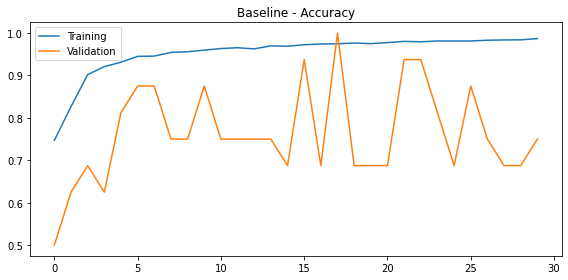

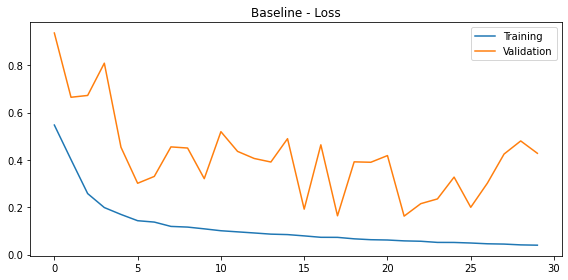

In [13]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range((len(acc)))

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

fig1 = plt.figure()
plt.title('Baseline - Accuracy')
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()


fig2 = plt.figure()
plt.title('Baseline - Loss')
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.show()

These visualizations show us the model's binary accuracy and loss metrics throughout the training epochs. The information is very jumpy due to the nature of our dataset, and the number of epochs used. Nonetheless, the validation results seem to, *for the most part*, trend in the same direction as the accuracy results.

Now we will check the model's ability to make predictions on the test dataset. We will display these predictions in the form of a confusion matrix showing the predictions and true labels for each item in the data.

In [14]:
# create confusion matrix helper function:
def plot_confusion(title, save_name):
    #round to get binary assignment from prediction
    preds = np.round(model.predict(test_data),0)
    test_labels = test_data.labels

    #confusion matrix for test data
    conf_matrix = confusion_matrix(test_labels,preds)

    # plot confusion matrix values
    sns.heatmap(
    conf_matrix, 
    annot=True, 
    cmap='Blues', 
    fmt='0.5g'
    )

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)

    plt.savefig('./img/'+save_name+'.png')
    plt.show()

20/20 [==============================] - 10s 472ms/step


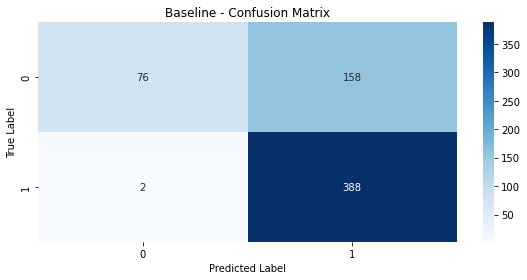

In [15]:
plot_confusion('Baseline - Confusion Matrix', '1-baseline-conf')

The above confusion matrix shows the 4 different types of predictions a model can make. As a refresher:

__True Positives (Bottom Right)__ indicate the that model accurately predicting Pneumonia in an X-Ray.

__True Negatives (Top Left)__ indicate that the model accurately predicted that the X-Ray was of a healthy subject.

__False Positives (Top Right)__ indicate that the model innacurately assessed the X-Ray as indicating Pneumonia, when in fact the patient was healthy.

__False Negatives (Bottom Left)__ similarly show a prediction that the X-Ray was that of a healthy patient, when the correct assessment would be Pneumonia.

The most important number we want to focus on is the one in the __False Negatives__ box. Ideally, this number will be as close to 0 as possible in order to avoid ever misdiagnosing a patient as healthy, thus putting them at significant risk!

This model shows a very ideal number of False Negatives (only 2!), making it likely to give us the high __recall__ score we hoped for! So at the very least, we know that our baseline model would at least only very rarely identify a patient as healthy when they were in fact sick. __Hoewever__, this model likely also has a very poor __precision__ score, as it predicted 158 times that a patient had pneumonia when in fact they were healthy. In future models, we want to bring this number down, in turn bringing up the __accuracy__ score, so that our model can accurately predict the correct labels for the test set.

In [16]:
train_loss, train_acc, train_prec, train_rec = model.evaluate(train_data)
val_loss, val_acc, val_prec, val_rec = model.evaluate(val_data)
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_data)

data = [{'Data' : 'Train', 'Accuracy' : train_acc, 'Loss' : train_loss, 'Precision' : train_prec, 'Recall' : train_rec},
        {'Data' : 'Val', 'Accuracy' : val_acc, 'Loss' : val_loss, 'Precision' : val_prec, 'Recall' : val_rec}]

scores_df = pd.DataFrame(data)

scores_1 = scores_df

scores_df

20/20 [==============================] - 10s 461ms/step - loss: 1.4104 - binary_accuracy: 0.7436 - precision: 0.7106 - recall: 0.9949


,Data,Accuracy,Loss,Precision,Recall
0,Train,0.986771,0.033815,0.986452,0.995871
1,Val,0.750000,0.427815,0.666667,1.000000


The above scores are a good thing to take note of. We can see some pretty drastic differences between train and validation metrics. Additionally, the high recall score in this instance is because of the class imbalance in the dataset, and therefore means nothing without higher scores in accuracy and precision.

The truer measure of the baseline model's success is below. This will show the model's performance when predicting outcomes on the test data, which it has never seen until this moment.

In [17]:
#Save Model Scores on Test Data
model_name = 'Baseline CNN'

df_model_scores = df_model_scores.append({'Model Name' : model_name, 'Accuracy' : test_acc, 'Loss' : test_loss, 'Precision' : test_prec, 'Recall' : test_rec},
        ignore_index = True)

df_model_scores

,Model Name,Accuracy,Loss,Precision,Recall
0,Baseline CNN,0.74359,1.410402,0.710623,0.994872


Our first batch of model scores on the test data are stored above. This will help later as we add more models so that we can compare the results of each.

In [18]:
#save info for later retrieval:

#model and history
model.save('./models/1-baseline')
model_1 = model
history_1 = history

#acc and loss charts
fig1.savefig('./img/1-base-acc.png')
fig2.savefig('./img/1-base-loss.png')

INFO:tensorflow:Assets written to: ./models/1-baseline\assets


INFO:tensorflow:Assets written to: ./models/1-baseline\assets


***
## Model 2 - Increase Batch Size

### Designing the Model

The first model didn't perform terribly, but we want to look into solutions for __increasing the accuracy__ of our neural network while also __reducing the loss__, and hopefully __maintaining the high recall score__. Next we will attempt to run a nearly identical model, but with an increased batch size in the training phase. In the training section, this will look like:
    
    batch_size = 64
    
Because of the variance in our data mentioned earlier, we will increase the batch size (which is 32 by default) to make sure that our model is not being poorly trained due to not getting an appropriate amount of data per batch.

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))


#compile
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=[my_metrics]
    )

#summary
# model.summary()

### Training

In [20]:
#track time model takes
start = datetime.datetime.now()

history = model.fit(
    train_data,
    epochs=30,
    validation_data=val_data,
    batch_size = 64
)

#display time taken
end = datetime.datetime.now()
print('Training Time: ',end-start)

Epoch 1/30
163/163 [==============================] - 128s 782ms/step - loss: 0.5219 - binary_accuracy: 0.7536 - precision: 0.7578 - recall: 0.9740 - val_loss: 0.5853 - val_binary_accuracy: 0.7500 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 2/30
163/163 [==============================] - 136s 832ms/step - loss: 0.3677 - binary_accuracy: 0.8524 - precision: 0.8711 - recall: 0.9404 - val_loss: 1.3050 - val_binary_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/30
163/163 [==============================] - 116s 710ms/step - loss: 0.2512 - binary_accuracy: 0.8997 - precision: 0.9184 - recall: 0.9494 - val_loss: 0.8603 - val_binary_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 4/30
163/163 [==============================] - 122s 745ms/step - loss: 0.1981 - binary_accuracy: 0.9227 - precision: 0.9424 - recall: 0.9543 - val_loss: 0.6925 - val_binary_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 5/30
163/163 [============

### Evaluating

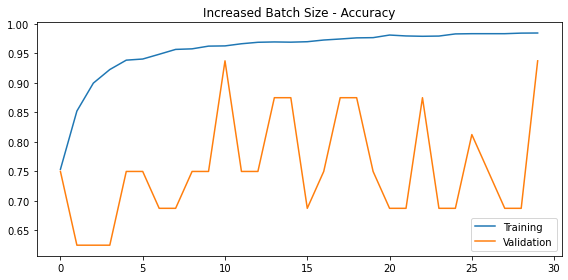

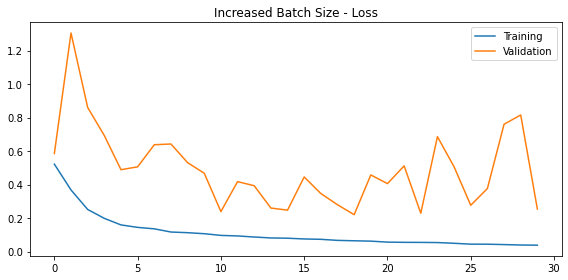

In [21]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range((len(acc)))

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True


fig1 = plt.figure()
plt.title('Increased Batch Size - Accuracy')
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()


fig2 = plt.figure()
plt.title('Increased Batch Size - Loss')
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.show()

Still some erratic behavior in these visualizations, but this is to be expected with this type of data.

20/20 [==============================] - 9s 414ms/step


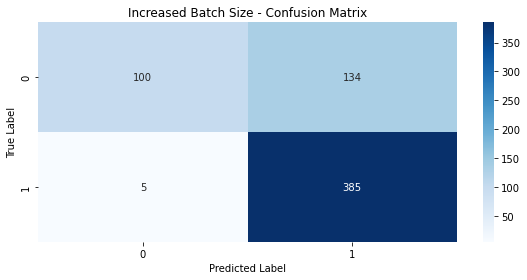

In [22]:
plot_confusion('Increased Batch Size - Confusion Matrix', '2-batch-conf')

This confusion matrix is essentially the same as the previous model.

In [23]:
train_loss, train_acc, train_prec, train_rec = model.evaluate(train_data)
val_loss, val_acc, val_prec, val_rec = model.evaluate(val_data)
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_data)

data = [{'Data' : 'Train', 'Accuracy' : train_acc, 'Loss' : train_loss, 'Precision' : train_prec, 'Recall' : train_rec},
        {'Data' : 'Val', 'Accuracy' : val_acc, 'Loss' : val_loss, 'Precision' : val_prec, 'Recall' : val_rec}]

scores_df = pd.DataFrame(data)

scores_2 = scores_df

scores_df

20/20 [==============================] - 9s 413ms/step - loss: 1.0713 - binary_accuracy: 0.7772 - precision: 0.7418 - recall: 0.9872


,Data,Accuracy,Loss,Precision,Recall
0,Train,0.987155,0.033753,0.997128,0.985548
1,Val,0.937500,0.253734,0.888889,1.000000


In [24]:
model_name = 'Increased Batch Size'

df_model_scores = df_model_scores.append({'Model Name' : model_name, 'Accuracy' : test_acc, 'Loss' : test_loss, 'Precision' : test_prec, 'Recall' : test_rec},
        ignore_index = True)

df_model_scores

,Model Name,Accuracy,Loss,Precision,Recall
0,Baseline CNN,0.743590,1.410402,0.710623,0.994872
1,Increased Batch Size,0.777244,1.071303,0.741811,0.987179


We can see from the dataframe storing the scores that the Increased Batch Size model was a slight improvement, but still did not yield the increase in accuracy that we need.

In [25]:
#save info for later retrieval:

#model and history
model.save('./models/2-increased-batch')
model_2 = model
history_2 = history

#acc and loss charts
fig1.savefig('./img/2-batch-acc.png')
fig2.savefig('./img/2-batch-loss.png')

INFO:tensorflow:Assets written to: ./models/2-increased-batch\assets


INFO:tensorflow:Assets written to: ./models/2-increased-batch\assets


***
## Model 3 - Augment Training Data

In the next step, we will attempt to fix our model's potential for __overfitting__, where the model is getting trained __too well__ on the training data and cannot detect appropriate patterns when applied to the validation data.

A standard way we cann prevent overfitting on this training data is to augment the training data. Our data is all composed of very, very similar images of x-rays of ribcages, with very few differences in the scale or positioning. We don't have additional x-rays that look different to this, so we will instead make it so that the training images will be randomly repositioned and manipulated (within constraints). This will help our model learn specific patterns from various rotational angles, zoom levels, and positions. This will prevent the model from training itself too precisely.

In [25]:
#augment data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

aug_train_data = train_datagen.flow_from_directory(train_dir, 
                                                   target_size=(150,150),
                                                   seed = 42,
                                                   class_mode='binary') 

Found 5216 images belonging to 2 classes.


As an example, lets look at how some of the images from this new data generator might look:

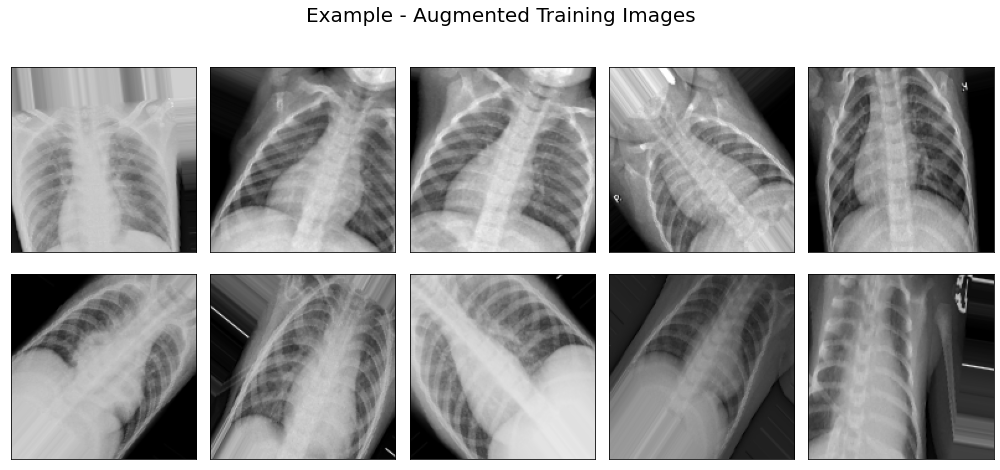

In [27]:
aug_imgs_example = aug_train_data[0][0][0:10]

aug_fig,normal_ax = plt.subplots(2,5,figsize=(14,7))

for idx,image in enumerate(aug_imgs_example):
        active_axis = normal_ax[idx//5][idx%5]
        active_axis.imshow(image)
        active_axis.set_xticks([])
        active_axis.set_yticks([])
aug_fig.suptitle('Example - Augmented Training Images', fontsize=20);

aug_fig.savefig('./img/0-augmented_img_example.png')

This makes our training data much more varied, and should hopefully train our model to make more generalized predictions about patterns it detects and prevent overfitting.

### Designing the Model

The model will be designed the same as 

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))


#compile
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=[my_metrics]
    )

#summary
# model.summary()

### Training

In [29]:
#track time model takes
start = datetime.datetime.now()

history = model.fit(
    train_data,
    epochs=30,
    validation_data=val_data
)

#display time taken
end = datetime.datetime.now()
print('Training Time: ',end-start)

Epoch 1/30
163/163 [==============================] - 114s 696ms/step - loss: 0.5182 - binary_accuracy: 0.7608 - precision: 0.7623 - recall: 0.9773 - val_loss: 0.5601 - val_binary_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 0.6250
Epoch 2/30
163/163 [==============================] - 113s 689ms/step - loss: 0.3727 - binary_accuracy: 0.8489 - precision: 0.8686 - recall: 0.9386 - val_loss: 0.8691 - val_binary_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/30
163/163 [==============================] - 113s 692ms/step - loss: 0.2442 - binary_accuracy: 0.9022 - precision: 0.9216 - recall: 0.9492 - val_loss: 0.8138 - val_binary_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 4/30
163/163 [==============================] - 113s 694ms/step - loss: 0.1816 - binary_accuracy: 0.9291 - precision: 0.9465 - recall: 0.9587 - val_loss: 1.3882 - val_binary_accuracy: 0.5625 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 5/30
163/163 [============

### Evaluating

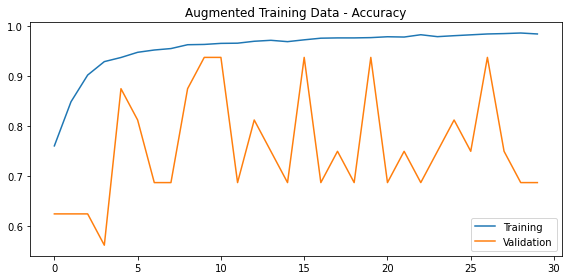

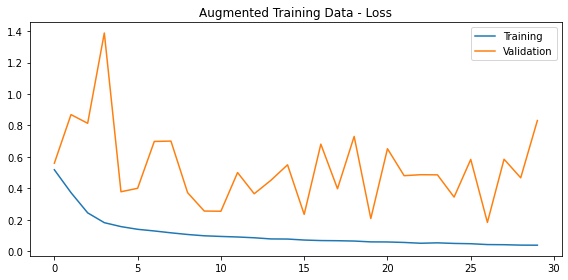

In [30]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range((len(acc)))

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True



fig1 = plt.figure()
plt.title('Augmented Training Data - Accuracy')
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()



fig2 = plt.figure()
plt.title('Augmented Training Data - Loss')
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.show()

We can see from the visualizations that there is stil not a lot of consistency on the validation data performance.

20/20 [==============================] - 9s 401ms/step


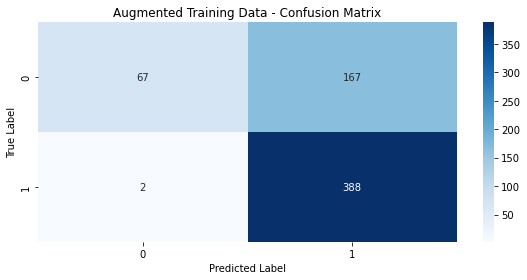

In [31]:
plot_confusion('Augmented Training Data - Confusion Matrix', '3-aug-data-conf')

Unfortunately we still aren't seeing improvement in the model's ability to predict __True Negatives__, and it still overpredicts __False Positives__.

In [32]:
train_loss, train_acc, train_prec, train_rec = model.evaluate(train_data)
val_loss, val_acc, val_prec, val_rec = model.evaluate(val_data)
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_data)

data = [{'Data' : 'Train', 'Accuracy' : train_acc, 'Loss' : train_loss, 'Precision' : train_prec, 'Recall' : train_rec},
        {'Data' : 'Val', 'Accuracy' : val_acc, 'Loss' : val_loss, 'Precision' : val_prec, 'Recall' : val_rec}]

scores_df = pd.DataFrame(data)

scores_3 = scores_df

scores_df

20/20 [==============================] - 9s 407ms/step - loss: 1.5763 - binary_accuracy: 0.7292 - precision: 0.6991 - recall: 0.9949


,Data,Accuracy,Loss,Precision,Recall
0,Train,0.983896,0.040113,0.980969,0.997677
1,Val,0.687500,0.831354,0.615385,1.000000


In [33]:
model_name = 'Augmented Training Data'

df_model_scores = df_model_scores.append({'Model Name' : model_name, 'Accuracy' : test_acc, 'Loss' : test_loss, 'Precision' : test_prec, 'Recall' : test_rec},
        ignore_index = True)

df_model_scores

,Model Name,Accuracy,Loss,Precision,Recall
0,Baseline CNN,0.743590,1.410402,0.710623,0.994872
1,Increased Batch Size,0.777244,1.071303,0.741811,0.987179
2,Augmented Training Data,0.729167,1.576254,0.699099,0.994872


We can see from the dataframe that this attempt produced better scores on the test data than previous models. Every single metric has improved, with the exception of Recall which remains the same high result as in the baseline. We will keep the augmented training data for future models.

In [34]:
#save info for later retrieval:

#model and history
model.save('./models/3-augmented-data')
model_3 = model
history_3 = history

#acc and loss charts
fig1.savefig('./img/3-augmented-data-acc.png')
fig2.savefig('./img/3-augmented-data-loss.png')

INFO:tensorflow:Assets written to: ./models/3-augmented-data\assets


INFO:tensorflow:Assets written to: ./models/3-augmented-data\assets


***
## Model 4 - More Layers

We will now attemot to add more dense layers to our model.

### Designing the Model

In [35]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#compile
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=[my_metrics]
    )

#summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 128)     

### Training

In [36]:
#track time model takes
start = datetime.datetime.now()

history = model.fit(
    aug_train_data,
    epochs=30,
    validation_data=val_data
)

#display time taken
end = datetime.datetime.now()
print('Training Time: ',end-start)

Epoch 1/30
163/163 [==============================] - 139s 845ms/step - loss: 0.5772 - binary_accuracy: 0.7414 - precision: 0.7387 - recall: 0.9995 - val_loss: 0.8279 - val_binary_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/30
163/163 [==============================] - 137s 842ms/step - loss: 0.5637 - binary_accuracy: 0.7429 - precision: 0.7429 - recall: 1.0000 - val_loss: 0.9129 - val_binary_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/30
163/163 [==============================] - 133s 815ms/step - loss: 0.5545 - binary_accuracy: 0.7416 - precision: 0.7431 - recall: 0.9966 - val_loss: 0.9317 - val_binary_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/30
163/163 [==============================] - 132s 807ms/step - loss: 0.5419 - binary_accuracy: 0.7429 - precision: 0.7491 - recall: 0.9832 - val_loss: 0.7703 - val_binary_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/30
163/163 [============

### Evaluating

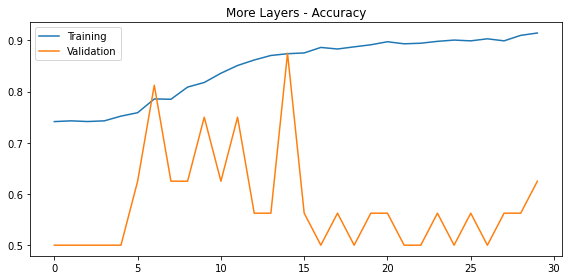

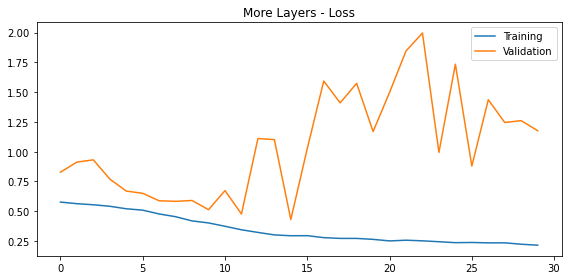

In [37]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range((len(acc)))

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True


fig1 = plt.figure()
plt.title('More Layers - Accuracy')
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()

fig2 = plt.figure()
plt.title('More Layers - Loss')
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.show()

We can see from the visualizations that adding layers only further separated our training and validation performance. Let's see how this carries over to the test data.

20/20 [==============================] - 9s 423ms/step


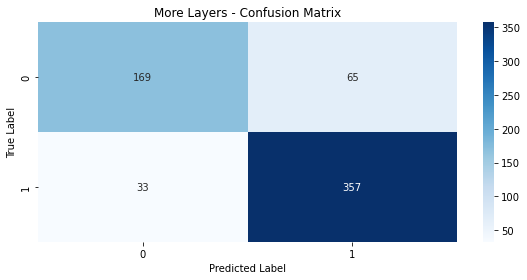

In [38]:
plot_confusion('More Layers - Confusion Matrix', '4-more-layers-conf')

Clearly the low accuracy and high loss of the validation data was misleading, as this model performs very well on the test data compared to the previous ones. Unfortunately this comes at the cost of incrased False Negatives, but we see a dramatic improvement in our model's ability to predict True Negatives.

In [39]:
train_loss, train_acc, train_prec, train_rec = model.evaluate(train_data)
val_loss, val_acc, val_prec, val_rec = model.evaluate(val_data)
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_data)

data = [{'Data' : 'Train', 'Accuracy' : train_acc, 'Loss' : train_loss, 'Precision' : train_prec, 'Recall' : train_rec},
        {'Data' : 'Val', 'Accuracy' : val_acc, 'Loss' : val_loss, 'Precision' : val_prec, 'Recall' : val_rec}]

scores_df = pd.DataFrame(data)

scores_4 = scores_df

scores_df

20/20 [==============================] - 8s 373ms/step - loss: 0.4675 - binary_accuracy: 0.8429 - precision: 0.8460 - recall: 0.9154


,Data,Accuracy,Loss,Precision,Recall
0,Train,0.920629,0.193327,0.980294,0.911484
1,Val,0.625000,1.176637,0.571429,1.000000


In [40]:
model_name = 'More Layers'

df_model_scores = df_model_scores.append({'Model Name' : model_name, 'Accuracy' : test_acc, 'Loss' : test_loss, 'Precision' : test_prec, 'Recall' : test_rec},
        ignore_index = True)

df_model_scores

,Model Name,Accuracy,Loss,Precision,Recall
0,Baseline CNN,0.743590,1.410402,0.710623,0.994872
1,Increased Batch Size,0.777244,1.071303,0.741811,0.987179
2,Augmented Training Data,0.729167,1.576254,0.699099,0.994872
3,More Layers,0.842949,0.467549,0.845972,0.915385


We can see from the dataframe storing the scores that this model easily outperforms previous ones.

In [41]:
#save info for later retrieval:

#model and history
model.save('./models/4-more-layers')
model_4 = model
history_4 = history

#acc and loss charts
fig1.savefig('./img/4-more-layers.png')
fig2.savefig('./img/4-more-layers.png')

INFO:tensorflow:Assets written to: ./models/4-more-layers\assets


INFO:tensorflow:Assets written to: ./models/4-more-layers\assets


***
## Model 5 - New Optimizer - RMSprop

### Designing the Model

Though our model is performing better and better, we'll now check to make sure the previous optimizer, Stochastic Gradient Descent, was not holding us back. We'll try two adaptive optimizers (RMSprop and then Adam) in the next two models, with all the other steps remaining the same.

In [42]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#compile
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    loss='binary_crossentropy',
    metrics=[my_metrics]
    )

#display summary
# model.summary()

### Training

In [43]:
#track time model takes
start = datetime.datetime.now()

history = model.fit(
    aug_train_data,
    epochs=30,
    validation_data=val_data
)

#display time taken
end = datetime.datetime.now()
print('Training Time: ',end-start)

Epoch 1/30
163/163 [==============================] - 137s 833ms/step - loss: 0.5743 - binary_accuracy: 0.7536 - precision: 0.7506 - recall: 0.9923 - val_loss: 0.8223 - val_binary_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/30
163/163 [==============================] - 134s 823ms/step - loss: 0.5162 - binary_accuracy: 0.7490 - precision: 0.7489 - recall: 0.9961 - val_loss: 0.7306 - val_binary_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/30
163/163 [==============================] - 134s 824ms/step - loss: 0.4475 - binary_accuracy: 0.7897 - precision: 0.8012 - recall: 0.9535 - val_loss: 0.9300 - val_binary_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 4/30
163/163 [==============================] - 134s 823ms/step - loss: 0.4053 - binary_accuracy: 0.8096 - precision: 0.8403 - recall: 0.9182 - val_loss: 0.7705 - val_binary_accuracy: 0.6875 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 5/30
163/163 [============

### Evaluating

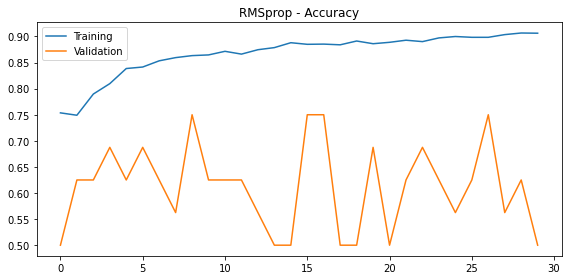

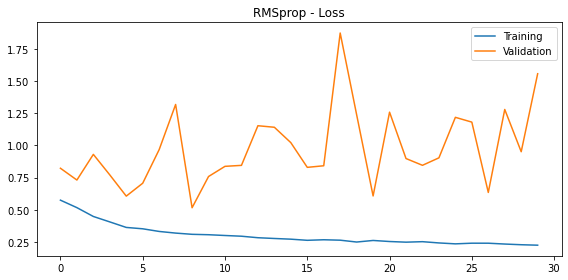

In [44]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range((len(acc)))

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True


fig1 = plt.figure()
plt.title('RMSprop - Accuracy')
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()

fig2 = plt.figure()
plt.title('RMSprop - Loss')
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.show()

20/20 [==============================] - 9s 409ms/step


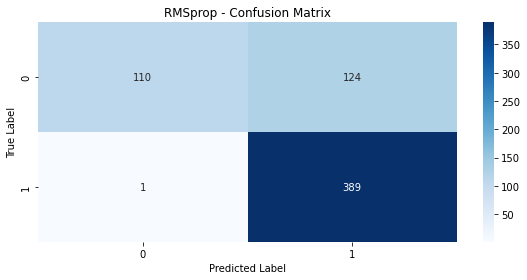

In [45]:
plot_confusion('RMSprop - Confusion Matrix', '5-rmsprop-conf')

This is less than ideal. Unfortunately the new optimizer was not well suited to improving on our previous model performance. There may be only one False Negative, but it is clear that the model greatly struggles when identifying positive cases.

In [46]:
train_loss, train_acc, train_prec, train_rec = model.evaluate(train_data)
val_loss, val_acc, val_prec, val_rec = model.evaluate(val_data)
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_data)

data = [{'Data' : 'Train', 'Accuracy' : train_acc, 'Loss' : train_loss, 'Precision' : train_prec, 'Recall' : train_rec},
        {'Data' : 'Val', 'Accuracy' : val_acc, 'Loss' : val_loss, 'Precision' : val_prec, 'Recall' : val_rec}]

scores_df = pd.DataFrame(data)

scores_5 = scores_df

scores_df

20/20 [==============================] - 9s 397ms/step - loss: 0.4980 - binary_accuracy: 0.7997 - precision: 0.7583 - recall: 0.9974


,Data,Accuracy,Loss,Precision,Recall
0,Train,0.932515,0.188988,0.933547,0.978839
1,Val,0.500000,1.556713,0.500000,1.000000


In [47]:
model_name = 'RMSprop Optimizer'

df_model_scores = df_model_scores.append({'Model Name' : model_name, 'Accuracy' : test_acc, 'Loss' : test_loss, 'Precision' : test_prec, 'Recall' : test_rec},
        ignore_index = True)

df_model_scores

,Model Name,Accuracy,Loss,Precision,Recall
0,Baseline CNN,0.743590,1.410402,0.710623,0.994872
1,Increased Batch Size,0.777244,1.071303,0.741811,0.987179
2,Augmented Training Data,0.729167,1.576254,0.699099,0.994872
3,More Layers,0.842949,0.467549,0.845972,0.915385
4,RMSprop Optimizer,0.799679,0.497969,0.758285,0.997436


As expected, the scores show that our model is unferperforming compared to the previous.

In [48]:
#save info for later retrieval:

#model and history
model.save('./models/5-rmsprop')
model_5 = model
history_5 = history

#acc and loss charts
fig1.savefig('./img/5-rmsprop-acc.png')
fig2.savefig('./img/5-rmsprop-loss.png')

INFO:tensorflow:Assets written to: ./models/5-rmsprop\assets


INFO:tensorflow:Assets written to: ./models/5-rmsprop\assets


***
## Model 6 - New Optimizer - Adam

### Designing the Model

As stated earlier, we will now proceed with testing again witht the Adam Optimizer instead of SGD or RMSprop.

In [49]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#compile
model.compile(
    optimizer=optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=[my_metrics]
    )

#display summary
# model.summary()

### Training

In [50]:
#track time model takes
start = datetime.datetime.now()

history = model.fit(
    aug_train_data,
    epochs=30,
    validation_data=val_data
)

#display time taken
end = datetime.datetime.now()
print('Training Time: ',end-start)

Epoch 1/30
163/163 [==============================] - 156s 951ms/step - loss: 0.5403 - binary_accuracy: 0.7515 - precision: 0.7601 - recall: 0.9641 - val_loss: 0.8003 - val_binary_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/30
163/163 [==============================] - 160s 979ms/step - loss: 0.4392 - binary_accuracy: 0.7782 - precision: 0.8272 - recall: 0.8867 - val_loss: 0.6963 - val_binary_accuracy: 0.5625 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/30
163/163 [==============================] - 141s 863ms/step - loss: 0.3797 - binary_accuracy: 0.8255 - precision: 0.8640 - recall: 0.9081 - val_loss: 0.3007 - val_binary_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 4/30
163/163 [==============================] - 131s 800ms/step - loss: 0.3101 - binary_accuracy: 0.8616 - precision: 0.9064 - recall: 0.9074 - val_loss: 0.4439 - val_binary_accuracy: 0.8125 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 5/30
163/163 [============

### Evaluating

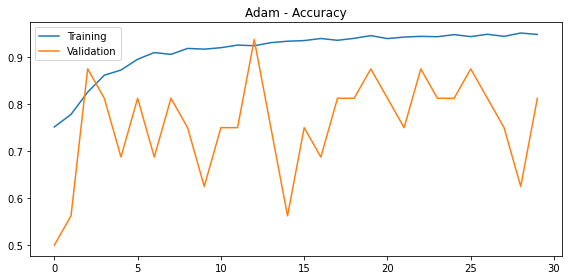

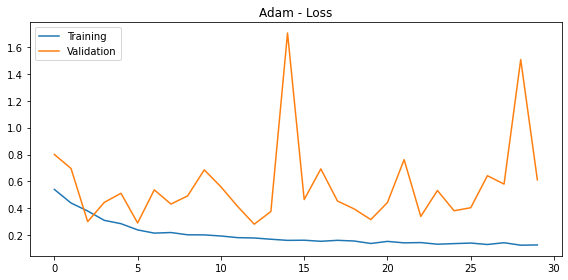

In [51]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range((len(acc)))

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True


fig1 = plt.figure()
plt.title('Adam - Accuracy')
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()

fig2 = plt.figure()
plt.title('Adam - Loss')
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.show()

While our accuracy and loss are still not incredibly smooth, the new model has more similarity between train and validation data than previous models.

20/20 [==============================] - 10s 462ms/step


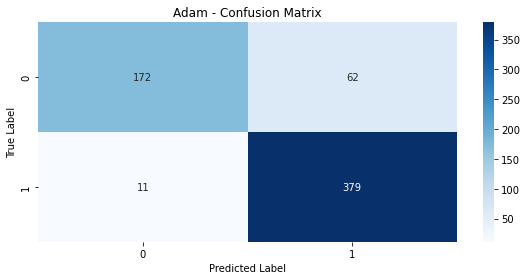

In [52]:
plot_confusion('Adam - Confusion Matrix', '6-adam-conf')

This confision matrix shows us that with the Adam optimizer, our model is still very accurate! In addition, the increase in accuracy does not come at the cost of a high number of False Negatives! This is very important, as we do not want a model that misdiagnoses a patient as healthy when they are in need!

In [53]:
train_loss, train_acc, train_prec, train_rec = model.evaluate(train_data)
val_loss, val_acc, val_prec, val_rec = model.evaluate(val_data)
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_data)

data = [{'Data' : 'Train', 'Accuracy' : train_acc, 'Loss' : train_loss, 'Precision' : train_prec, 'Recall' : train_rec},
        {'Data' : 'Val', 'Accuracy' : val_acc, 'Loss' : val_loss, 'Precision' : val_prec, 'Recall' : val_rec}]

scores_df = pd.DataFrame(data)

scores_6 = scores_df

scores_df

20/20 [==============================] - 10s 477ms/step - loss: 0.3109 - binary_accuracy: 0.8830 - precision: 0.8594 - recall: 0.9718


,Data,Accuracy,Loss,Precision,Recall
0,Train,0.957247,0.113958,0.983581,0.958452
1,Val,0.812500,0.611226,0.727273,1.000000


In [54]:
model_name = 'Adam Optimizer'

df_model_scores = df_model_scores.append({'Model Name' : model_name, 'Accuracy' : test_acc, 'Loss' : test_loss, 'Precision' : test_prec, 'Recall' : test_rec},
        ignore_index = True)

df_model_scores

,Model Name,Accuracy,Loss,Precision,Recall
0,Baseline CNN,0.743590,1.410402,0.710623,0.994872
1,Increased Batch Size,0.777244,1.071303,0.741811,0.987179
2,Augmented Training Data,0.729167,1.576254,0.699099,0.994872
3,More Layers,0.842949,0.467549,0.845972,0.915385
4,RMSprop Optimizer,0.799679,0.497969,0.758285,0.997436
5,Adam Optimizer,0.883013,0.310923,0.859410,0.971795


This is our strongest model so far. Now we will see what further improvements we can make to increase accuracy and precision scores.

In [55]:
#save info for later retrieval:

#model and history
model.save('./models/6-adam')
model_6 = model
history_6 = history

#acc and loss charts
fig1.savefig('./img/6-adam-acc.png')
fig2.savefig('./img/6-adam-loss.png')

INFO:tensorflow:Assets written to: ./models/6-adam\assets


INFO:tensorflow:Assets written to: ./models/6-adam\assets


***
## Model 7 - Implement Regularization



### Designing the Model

For our next step, we want to reduce overfitting to training data and improve Generalization in our model. Generalization is our model's ability to make predictions on new data it hasn't seen before. The way we will do this is by implementing __Dropout Layers__. These layers essentially make the model "forget" chunks of information, by randomly discarding nodes. This also reduces computational intensity and added randomness, all of which reduce overfitting.

In [56]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#DROPOUT REGULARIZATION:
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#compile
model.compile(
    optimizer=optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=[my_metrics]
    )

#display summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 17, 17, 128)     

### Training

In [57]:
#track time model takes
start = datetime.datetime.now()

history = model.fit(
    aug_train_data,
    epochs=30,
    validation_data=val_data
    
)

#display time taken
end = datetime.datetime.now()
print('Training Time: ',end-start)

Epoch 1/30
163/163 [==============================] - 176s 1s/step - loss: 0.5474 - binary_accuracy: 0.7625 - precision: 0.7627 - recall: 0.9796 - val_loss: 0.7941 - val_binary_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.8750
Epoch 2/30
163/163 [==============================] - 170s 1s/step - loss: 0.4780 - binary_accuracy: 0.7475 - precision: 0.7733 - recall: 0.9339 - val_loss: 0.6317 - val_binary_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.8750
Epoch 3/30
163/163 [==============================] - 167s 1s/step - loss: 0.4394 - binary_accuracy: 0.7657 - precision: 0.8091 - recall: 0.8960 - val_loss: 0.5233 - val_binary_accuracy: 0.8125 - val_precision: 0.7273 - val_recall: 1.0000
Epoch 4/30
163/163 [==============================] - 178s 1s/step - loss: 0.4447 - binary_accuracy: 0.7738 - precision: 0.8191 - recall: 0.8926 - val_loss: 0.5411 - val_binary_accuracy: 0.6875 - val_precision: 0.6154 - val_recall: 1.0000
Epoch 5/30
163/163 [========================

### Evaluating

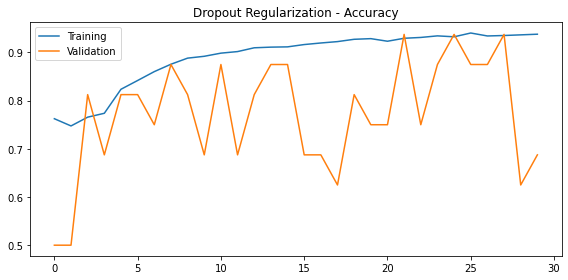

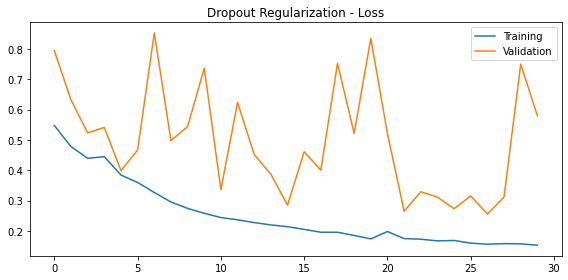

In [58]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range((len(acc)))

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True


fig1 = plt.figure()
plt.title('Dropout Regularization - Accuracy')
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()

fig2 = plt.figure()
plt.title('Dropout Regularization - Loss')
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.show()

20/20 [==============================] - 10s 481ms/step


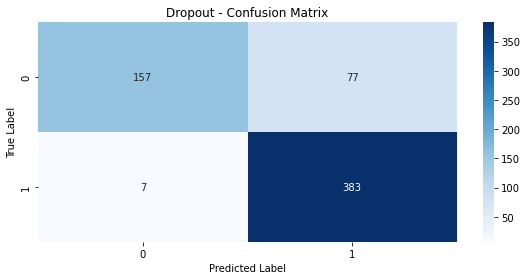

In [59]:
plot_confusion('Dropout - Confusion Matrix', '7-dropout-conf')

In [60]:
train_loss, train_acc, train_prec, train_rec = model.evaluate(train_data)
val_loss, val_acc, val_prec, val_rec = model.evaluate(val_data)
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_data)

data = [{'Data' : 'Train', 'Accuracy' : train_acc, 'Loss' : train_loss, 'Precision' : train_prec, 'Recall' : train_rec},
        {'Data' : 'Val', 'Accuracy' : val_acc, 'Loss' : val_loss, 'Precision' : val_prec, 'Recall' : val_rec}]

scores_df = pd.DataFrame(data)

scores_7 = scores_df

scores_df

20/20 [==============================] - 10s 462ms/step - loss: 0.3193 - binary_accuracy: 0.8654 - precision: 0.8326 - recall: 0.9821


,Data,Accuracy,Loss,Precision,Recall
0,Train,0.954179,0.138339,0.979937,0.957936
1,Val,0.687500,0.579690,0.615385,1.000000


In [61]:
model_name = 'Dropout Regularization'

df_model_scores = df_model_scores.append({'Model Name' : model_name, 'Accuracy' : test_acc, 'Loss' : test_loss, 'Precision' : test_prec, 'Recall' : test_rec},
        ignore_index = True)

df_model_scores

,Model Name,Accuracy,Loss,Precision,Recall
0,Baseline CNN,0.743590,1.410402,0.710623,0.994872
1,Increased Batch Size,0.777244,1.071303,0.741811,0.987179
2,Augmented Training Data,0.729167,1.576254,0.699099,0.994872
3,More Layers,0.842949,0.467549,0.845972,0.915385
4,RMSprop Optimizer,0.799679,0.497969,0.758285,0.997436
5,Adam Optimizer,0.883013,0.310923,0.859410,0.971795
6,Dropout Regularization,0.865385,0.319286,0.832609,0.982051


As expected, this model has comparable results to the previous. There is a slight reduction in the false negatives, however, so we can count it as at least partially successful!

In [62]:
#save info for later retrieval:

#model and history
model.save('./models/7-dropout')
model_7 = model
history_7 = history

#acc and loss charts
fig1.savefig('./img/7-dropout-acc.png')
fig2.savefig('./img/7-dropout-loss.png')

INFO:tensorflow:Assets written to: ./models/7-dropout\assets


INFO:tensorflow:Assets written to: ./models/7-dropout\assets


***
## Model 8 - Transfer Learning - VGG-19


Next, we will see what sort of results can be achieved with the help of *transfer learning*. We will use a pre-trained image classification model, in this case VGG-19, and compare results to our previous models.

VGG-19 is a convolutional neural network that is 19 layers deep. We will load a pre-trained version of this network that has already been trained on more than a million images from the ImageNet database. Hopefully, this models ability to identify key features of an image will successfully apply to the current problem.


### Designing the Model

First, we will import VGG-19 through keras, and use it as the baseline of our model. For this initial evaluation, we will set the entire vgg base model to be *untrainable*, and only train on the dense layers that we add on top of the existing baseline.

In [141]:
#import and add vgg-19 to top of model
from keras.applications import VGG19
vgg_model = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

In [142]:
model = models.Sequential()
model.add(vgg_model)

#trainable layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#set vgg model layers to be untrainable
vgg_model.trainable = False

#compile
model.compile(
    optimizer=optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=[my_metrics]
    )

#model.summary()

### Training

In [143]:
#track time model takes
start = datetime.datetime.now()

history = model.fit(
    aug_train_data,
    epochs=10,
    validation_data=val_data,
    verbose=2
)

#display time taken
end = datetime.datetime.now()
print('Training Time: ',end-start)

Epoch 1/10
163/163 - 503s - loss: 0.2974 - binary_accuracy: 0.6610 - precision_3: 0.8989 - recall_3: 0.6112 - val_loss: 0.7419 - val_binary_accuracy: 0.7500 - val_precision_3: 0.6667 - val_recall_3: 1.0000 - 503s/epoch - 3s/step
Epoch 2/10
163/163 - 510s - loss: 0.2132 - binary_accuracy: 0.9112 - precision_3: 0.9413 - recall_3: 0.9391 - val_loss: 0.5590 - val_binary_accuracy: 0.7500 - val_precision_3: 0.6667 - val_recall_3: 1.0000 - 510s/epoch - 3s/step
Epoch 3/10
163/163 - 420s - loss: 0.1856 - binary_accuracy: 0.9237 - precision_3: 0.9482 - recall_3: 0.9492 - val_loss: 0.4008 - val_binary_accuracy: 0.7500 - val_precision_3: 0.7500 - val_recall_3: 0.7500 - 420s/epoch - 3s/step
Epoch 4/10
163/163 - 418s - loss: 0.1917 - binary_accuracy: 0.9191 - precision_3: 0.9453 - recall_3: 0.9458 - val_loss: 0.9489 - val_binary_accuracy: 0.6875 - val_precision_3: 0.6154 - val_recall_3: 1.0000 - 418s/epoch - 3s/step
Epoch 5/10
163/163 - 420s - loss: 0.1816 - binary_accuracy: 0.9262 - precision_3: 0.

### Evaluating

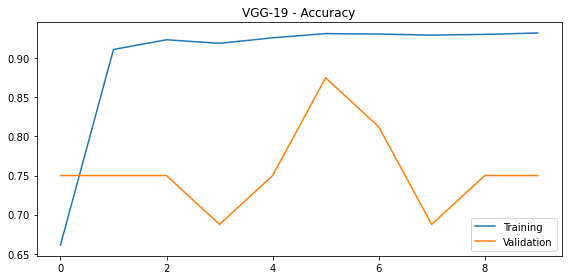

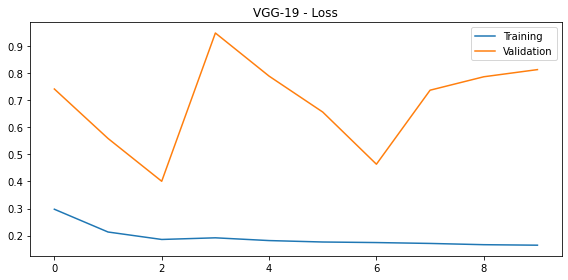

In [144]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range((len(acc)))

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True


fig1 = plt.figure()
plt.title('VGG-19 - Accuracy')
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()

fig2 = plt.figure()
plt.title('VGG-19 - Loss')
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.show()

20/20 [==============================] - 48s 2s/step


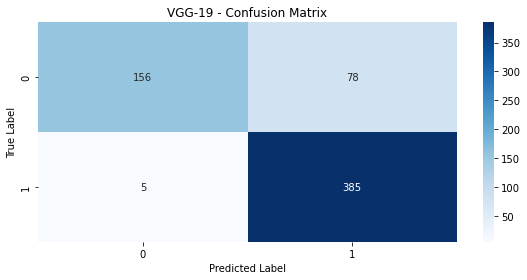

In [145]:
plot_confusion('VGG-19 - Confusion Matrix', '8-vgg19-conf')

Similar to our previous best model, this confusion matrix shows us some ideal results. False Negatives remain low, while the True Positives/Negatives are far stronger than our baseline.

In [146]:
train_loss, train_acc, train_prec, train_rec = model.evaluate(train_data)
val_loss, val_acc, val_prec, val_rec = model.evaluate(val_data)
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_data)

data = [{'Data' : 'Train', 'Accuracy' : train_acc, 'Loss' : train_loss, 'Precision' : train_prec, 'Recall' : train_rec},
        {'Data' : 'Val', 'Accuracy' : val_acc, 'Loss' : val_loss, 'Precision' : val_prec, 'Recall' : val_rec}]

scores_df = pd.DataFrame(data)

scores_8 = scores_df

scores_df

20/20 [==============================] - 51s 3s/step - loss: 0.3878 - binary_accuracy: 0.8670 - precision_3: 0.8315 - recall_3: 0.9872


,Data,Accuracy,Loss,Precision,Recall
0,Train,0.957439,0.117327,0.980026,0.962323
1,Val,0.750000,0.813573,0.666667,1.000000


In [155]:
model_name = 'VGG-19'

df_model_scores = df_model_scores.append({'Model Name' : model_name, 'Accuracy' : test_acc, 'Loss' : test_loss, 'Precision' : test_prec, 'Recall' : test_rec},
        ignore_index = True)

df_model_scores

,Model Name,Accuracy,Loss,Precision,Recall
0,Baseline CNN\t,0.743590,1.410402,0.710623,0.994872
1,Increased Batch Size,0.777244,1.071303,0.741811,0.987179
2,Augmented Training Data,0.729167,1.576254,0.699099,0.994872
3,More Layers,0.842949,0.467549,0.845972,0.915385
4,RMSprop Optimizer,0.799679,0.497969,0.758285,0.997436
5,Adam Optimizer,0.883013,0.310923,0.859410,0.971795
6,Dropout Regularization,0.865385,0.319286,0.832609,0.982051
7,VGG-19,0.866987,0.387849,0.831533,0.987179


In [156]:
#save info for later retrieval:

#model and history
model.save('./models/8-vgg')
model_8 = model
history_8 = history

#acc and loss charts
fig1.savefig('./img/8-vgg-acc.png')
fig2.savefig('./img/8-vgg-loss.png')

INFO:tensorflow:Assets written to: ./models/8-vgg\assets


INFO:tensorflow:Assets written to: ./models/8-vgg\assets


***
## Selecting Best Model

In order to choose which model is best trained for the purposes of this project, we'll look at the dataframe comparing each model one more time.

In [157]:
df_model_scores.style.hide_index()

Model Name,Accuracy,Loss,Precision,Recall
Baseline CNN,0.743590,1.410402,0.710623,0.994872
Increased Batch Size,0.777244,1.071303,0.741811,0.987179
Augmented Training Data,0.729167,1.576254,0.699099,0.994872
More Layers,0.842949,0.467549,0.845972,0.915385
RMSprop Optimizer,0.799679,0.497969,0.758285,0.997436
Adam Optimizer,0.883013,0.310923,0.859410,0.971795
Dropout Regularization,0.865385,0.319286,0.832609,0.982051
VGG-19,0.866987,0.387849,0.831533,0.987179


This can be a hard choice. The RMSProp Optimizer model, for example, had a very good recall score. When used on the test data, it only gave _one false negative_, which could be considered a good thing. However, it's accuracy was very poor, which shows that it only achieved this high recall because it tended to assume positive cases no matter what. This technically could prevent False Negative diagnoses, but isnt't a strong model because it isn't actually _predicting_ anything, just guessing positive in most instances.

The VGG-19 model, however, predicted _5 False Negatives_, but also had a much higher accuracy score. Because of this, we will go with VGG-19, and attempt to fine tune the hidden layers of the network in order to reduce the False Negatives.

# Fine Tuning Best Model

In order to fine tune the VGG-19 model, we will run the same model mutiple times with various iterations and  sequences of hidden layers and nodes. Because of the size of VGG-19, and the fact that our models don't tend to improve much after 10 epochs, we will reduce the epochs to 10 and see which performs the strongest.

## Fine Tuning - 1

In [162]:
name_x=1

model = models.Sequential()
model.add(vgg_model)

#trainable layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#set vgg model layers to be untrainable
vgg_model.trainable = False

    
#compile
model.compile(
    optimizer=optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=[my_metrics]
    )

#model.summary()

### Training

In [163]:
#track time model takes
start = datetime.datetime.now()

history = model.fit(
    aug_train_data,
    epochs=10,
    validation_data=val_data,
    verbose=2
)

#display time taken
end = datetime.datetime.now()
print('Training Time: ',end-start)

Epoch 1/10
163/163 - 369s - loss: 0.2924 - binary_accuracy: 0.8705 - precision_3: 0.8997 - recall_3: 0.9259 - val_loss: 0.5984 - val_binary_accuracy: 0.7500 - val_precision_3: 0.6667 - val_recall_3: 1.0000 - 369s/epoch - 2s/step
Epoch 2/10
163/163 - 407s - loss: 0.2250 - binary_accuracy: 0.9105 - precision_3: 0.9417 - recall_3: 0.9375 - val_loss: 0.7820 - val_binary_accuracy: 0.7500 - val_precision_3: 0.6667 - val_recall_3: 1.0000 - 407s/epoch - 2s/step
Epoch 3/10
163/163 - 418s - loss: 0.2033 - binary_accuracy: 0.9133 - precision_3: 0.9440 - recall_3: 0.9391 - val_loss: 0.4697 - val_binary_accuracy: 0.8750 - val_precision_3: 0.8000 - val_recall_3: 1.0000 - 418s/epoch - 3s/step
Epoch 4/10
163/163 - 445s - loss: 0.1967 - binary_accuracy: 0.9141 - precision_3: 0.9443 - recall_3: 0.9399 - val_loss: 0.5140 - val_binary_accuracy: 0.8750 - val_precision_3: 0.8000 - val_recall_3: 1.0000 - 445s/epoch - 3s/step
Epoch 5/10
163/163 - 433s - loss: 0.1883 - binary_accuracy: 0.9235 - precision_3: 0.

### Evaluating

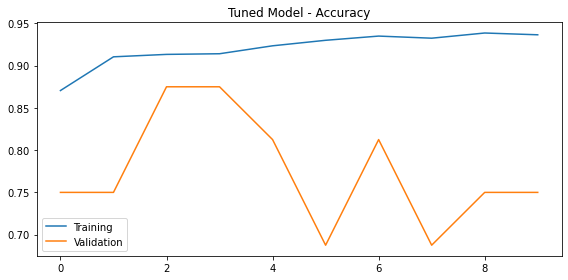

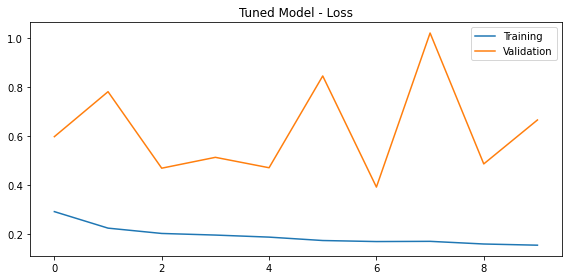

In [164]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range((len(acc)))

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True


fig1 = plt.figure()
plt.title('Tuned Model - Accuracy')
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()

fig2 = plt.figure()
plt.title('Tuned Model - Loss')
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.show()

20/20 [==============================] - 60s 3s/step


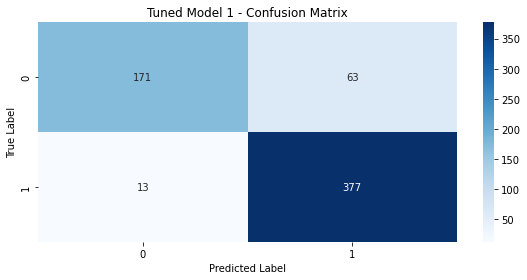

In [165]:
plot_confusion('Tuned Model '+ str(name_x) + ' - Confusion Matrix', 'tuning'+str(name_x)+'-conf')

It would appear that this variant with has only increased false negatives, which is our worst cast scenario.

In [166]:
#save info for later retrieval:

#model and history
model.save('./models/tuning_'+str(name_x))

#acc and loss charts
fig1.savefig('./img/tuning-'+str(name_x)+'acc.png')
fig2.savefig('./img/tuning-'+str(name_x)+'loss.png')

INFO:tensorflow:Assets written to: ./models/tuning_1\assets


INFO:tensorflow:Assets written to: ./models/tuning_1\assets


## Fine Tuning - 2

In [167]:
name_x = 2

model = models.Sequential()
model.add(vgg_model)

#trainable layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

#set vgg model layers to be untrainable
vgg_model.trainable = False

#compile
model.compile(
    optimizer=optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=[my_metrics]
    )

#model.summary()

### Training

In [168]:
#track time model takes
start = datetime.datetime.now()

history = model.fit(
    aug_train_data,
    epochs=10,
    validation_data=val_data,
    verbose=2
)

#display time taken
end = datetime.datetime.now()
print('Training Time: ',end-start)

Epoch 1/10
163/163 - 512s - loss: 0.3024 - binary_accuracy: 0.8641 - precision_3: 0.9038 - recall_3: 0.9142 - val_loss: 0.5284 - val_binary_accuracy: 0.8125 - val_precision_3: 0.7273 - val_recall_3: 1.0000 - 512s/epoch - 3s/step
Epoch 2/10
163/163 - 508s - loss: 0.2195 - binary_accuracy: 0.9105 - precision_3: 0.9392 - recall_3: 0.9404 - val_loss: 0.4692 - val_binary_accuracy: 0.8125 - val_precision_3: 0.7778 - val_recall_3: 0.8750 - 508s/epoch - 3s/step
Epoch 3/10
163/163 - 497s - loss: 0.1946 - binary_accuracy: 0.9214 - precision_3: 0.9457 - recall_3: 0.9486 - val_loss: 0.6266 - val_binary_accuracy: 0.7500 - val_precision_3: 0.6667 - val_recall_3: 1.0000 - 497s/epoch - 3s/step
Epoch 4/10
163/163 - 425s - loss: 0.1893 - binary_accuracy: 0.9264 - precision_3: 0.9505 - recall_3: 0.9505 - val_loss: 0.5647 - val_binary_accuracy: 0.8125 - val_precision_3: 0.7778 - val_recall_3: 0.8750 - 425s/epoch - 3s/step
Epoch 5/10
163/163 - 425s - loss: 0.1929 - binary_accuracy: 0.9212 - precision_3: 0.

### Evaluating

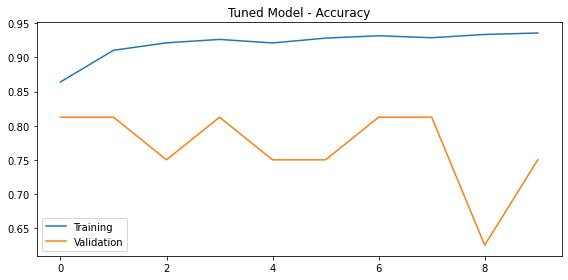

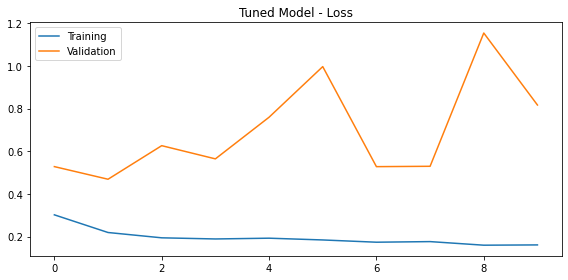

In [169]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range((len(acc)))

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True


fig1 = plt.figure()
plt.title('Tuned Model - Accuracy')
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()

fig2 = plt.figure()
plt.title('Tuned Model - Loss')
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.show()

20/20 [==============================] - 49s 2s/step


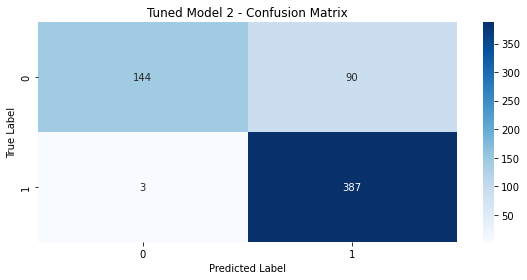

In [170]:
plot_confusion('Tuned Model '+ str(name_x) + ' - Confusion Matrix', 'tuning'+str(name_x)+'-conf')

This is an _improvement_, as we have dropped our __False Negatives from 5 to 3__! Additionally, __387 True Positives and 144 True Negatives__ means our model is very accurate.

In [171]:
#save info for later retrieval:

#model and history
model.save('./models/tuning_'+str(name_x))

#acc and loss charts
fig1.savefig('./img/tuning-'+str(name_x)+'acc.png')
fig2.savefig('./img/tuning-'+str(name_x)+'loss.png')

INFO:tensorflow:Assets written to: ./models/tuning_2\assets


INFO:tensorflow:Assets written to: ./models/tuning_2\assets


## Fine Tuning - 3


In [193]:
name_x = 3

model = models.Sequential()
model.add(vgg_model)

#trainable layers
model.add(layers.Flatten())

model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

#set vgg model layers to be untrainable
vgg_model.trainable = False

    
#compile
model.compile(
    optimizer=optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=[my_metrics]
    )

#model.summary()

### Training

In [194]:
#track time model takes
start = datetime.datetime.now()

history = model.fit(
    aug_train_data,
    epochs=10,
    validation_data=val_data,
    verbose=2
)

#display time taken
end = datetime.datetime.now()
print('Training Time: ',end-start)

Epoch 1/10
163/163 - 538s - loss: 0.3158 - binary_accuracy: 0.8595 - precision_3: 0.8947 - recall_3: 0.9189 - val_loss: 0.7000 - val_binary_accuracy: 0.7500 - val_precision_3: 0.6667 - val_recall_3: 1.0000 - 538s/epoch - 3s/step
Epoch 2/10
163/163 - 547s - loss: 0.2148 - binary_accuracy: 0.9101 - precision_3: 0.9364 - recall_3: 0.9430 - val_loss: 0.5954 - val_binary_accuracy: 0.8125 - val_precision_3: 0.7273 - val_recall_3: 1.0000 - 547s/epoch - 3s/step
Epoch 3/10
163/163 - 561s - loss: 0.2048 - binary_accuracy: 0.9155 - precision_3: 0.9400 - recall_3: 0.9466 - val_loss: 0.6636 - val_binary_accuracy: 0.7500 - val_precision_3: 0.7000 - val_recall_3: 0.8750 - 561s/epoch - 3s/step
Epoch 4/10
163/163 - 553s - loss: 0.1897 - binary_accuracy: 0.9293 - precision_3: 0.9525 - recall_3: 0.9523 - val_loss: 1.3405 - val_binary_accuracy: 0.6250 - val_precision_3: 0.5714 - val_recall_3: 1.0000 - 553s/epoch - 3s/step
Epoch 5/10
163/163 - 539s - loss: 0.1927 - binary_accuracy: 0.9224 - precision_3: 0.

### Evaluating

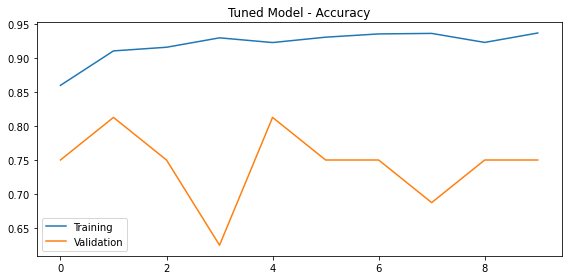

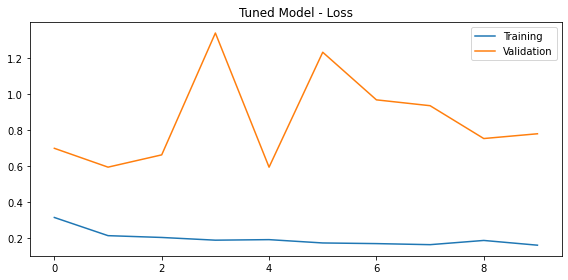

In [195]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range((len(acc)))

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True


fig1 = plt.figure()
plt.title('Tuned Model - Accuracy')
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()

fig2 = plt.figure()
plt.title('Tuned Model - Loss')
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.show()

20/20 [==============================] - 67s 3s/step


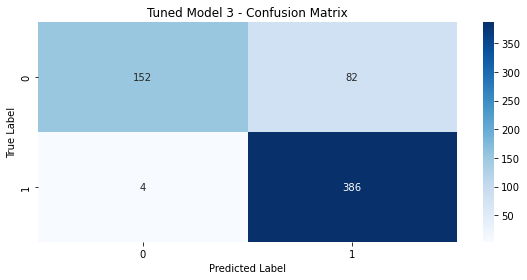

In [196]:
plot_confusion('Tuned Model '+ str(name_x) + ' - Confusion Matrix', 'tuning'+str(name_x)+'-conf')

This model is also an improvement over the original, and predicts just a few __more True Negatives__ and __less False Positives__.

__However__, it predicts __one more False Positive than the previous model__, and for the purposes of this study we would like to __save lives__ by dropping this number as low as possible.

In [197]:
#save info for later retrieval:

#model and history
model.save('./models/tuning_'+str(name_x))

#acc and loss charts
fig1.savefig('./img/tuning-'+str(name_x)+'acc.png')
fig2.savefig('./img/tuning-'+str(name_x)+'loss.png')

INFO:tensorflow:Assets written to: ./models/tuning_3\assets


INFO:tensorflow:Assets written to: ./models/tuning_3\assets


## Fine Tuning - 4



In [177]:
name_x = 4

model = models.Sequential()
model.add(vgg_model)

#trainable layers
model.add(layers.Flatten())

model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

#set vgg model layers to be untrainable
vgg_model.trainable = False

    
#compile
model.compile(
    optimizer=optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=[my_metrics]
    )

#model.summary()

### Training

In [178]:
#track time model takes
start = datetime.datetime.now()

history = model.fit(
    aug_train_data,
    epochs=10,
    validation_data=val_data,
    verbose=2
)

#display time taken
end = datetime.datetime.now()
print('Training Time: ',end-start)

Epoch 1/10
163/163 - 432s - loss: 0.3175 - binary_accuracy: 0.8601 - precision_3: 0.8958 - recall_3: 0.9184 - val_loss: 0.7417 - val_binary_accuracy: 0.7500 - val_precision_3: 0.6667 - val_recall_3: 1.0000 - 432s/epoch - 3s/step
Epoch 2/10
163/163 - 429s - loss: 0.2141 - binary_accuracy: 0.9153 - precision_3: 0.9474 - recall_3: 0.9381 - val_loss: 0.5685 - val_binary_accuracy: 0.7500 - val_precision_3: 0.6667 - val_recall_3: 1.0000 - 429s/epoch - 3s/step
Epoch 3/10
163/163 - 431s - loss: 0.2008 - binary_accuracy: 0.9206 - precision_3: 0.9482 - recall_3: 0.9448 - val_loss: 0.9844 - val_binary_accuracy: 0.7500 - val_precision_3: 0.6667 - val_recall_3: 1.0000 - 431s/epoch - 3s/step
Epoch 4/10
163/163 - 424s - loss: 0.2029 - binary_accuracy: 0.9187 - precision_3: 0.9469 - recall_3: 0.9435 - val_loss: 0.7710 - val_binary_accuracy: 0.7500 - val_precision_3: 0.6667 - val_recall_3: 1.0000 - 424s/epoch - 3s/step
Epoch 5/10
163/163 - 426s - loss: 0.1835 - binary_accuracy: 0.9291 - precision_3: 0.

### Evaluating

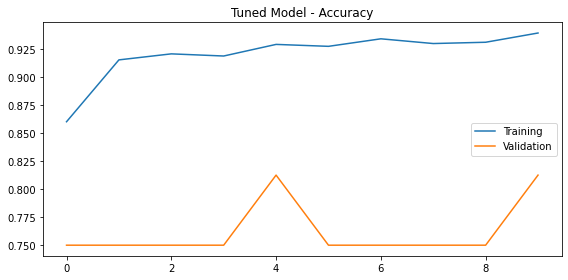

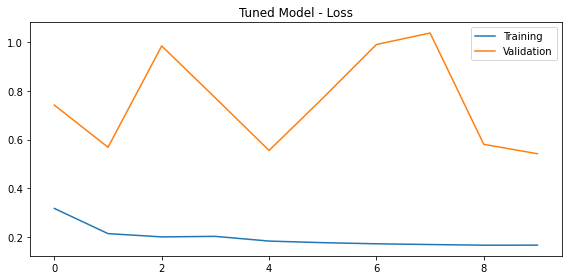

In [179]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range((len(acc)))

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True


fig1 = plt.figure()
plt.title('Tuned Model - Accuracy')
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()

fig2 = plt.figure()
plt.title('Tuned Model - Loss')
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.show()

20/20 [==============================] - 51s 3s/step


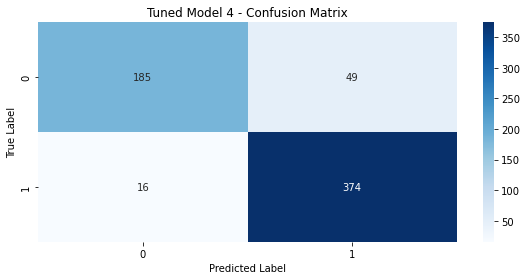

In [180]:
plot_confusion('Tuned Model '+ str(name_x) + ' - Confusion Matrix', 'tuning'+str(name_x)+'-conf')

Once again, we have only seen a spike in False Negatives in this instance, which we do not want.

In [181]:
#save info for later retrieval:

#model and history
model.save('./models/tuning_'+str(name_x))

#acc and loss charts
fig1.savefig('./img/tuning-'+str(name_x)+'acc.png')
fig2.savefig('./img/tuning-'+str(name_x)+'loss.png')

INFO:tensorflow:Assets written to: ./models/tuning_4\assets


INFO:tensorflow:Assets written to: ./models/tuning_4\assets


## Fine Tuning - 5

In [228]:
name_x = 5

model = models.Sequential()
model.add(vgg_model)

#trainable layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='relu'))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

#set vgg model layers to be untrainable
vgg_model.trainable = False

#compile
model.compile(
    optimizer=optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=[my_metrics]
    )

#model.summary()

### Training

In [229]:
#track time model takes
start = datetime.datetime.now()

history = model.fit(
    aug_train_data,
    epochs=10,
    validation_data=val_data,
    verbose=2
)

#display time taken
end = datetime.datetime.now()
print('Training Time: ',end-start)

Epoch 1/10
163/163 - 444s - loss: 0.3024 - binary_accuracy: 0.8563 - precision_3: 0.8915 - recall_3: 0.9181 - val_loss: 0.4185 - val_binary_accuracy: 0.8125 - val_precision_3: 0.7778 - val_recall_3: 0.8750 - 444s/epoch - 3s/step
Epoch 2/10
163/163 - 454s - loss: 0.2201 - binary_accuracy: 0.9086 - precision_3: 0.9420 - recall_3: 0.9345 - val_loss: 0.6958 - val_binary_accuracy: 0.8125 - val_precision_3: 0.7273 - val_recall_3: 1.0000 - 454s/epoch - 3s/step
Epoch 3/10
163/163 - 459s - loss: 0.2158 - binary_accuracy: 0.9130 - precision_3: 0.9416 - recall_3: 0.9412 - val_loss: 1.8176 - val_binary_accuracy: 0.6875 - val_precision_3: 0.6154 - val_recall_3: 1.0000 - 459s/epoch - 3s/step
Epoch 4/10
163/163 - 459s - loss: 0.2050 - binary_accuracy: 0.9224 - precision_3: 0.9502 - recall_3: 0.9450 - val_loss: 1.7188 - val_binary_accuracy: 0.6250 - val_precision_3: 0.5714 - val_recall_3: 1.0000 - 459s/epoch - 3s/step
Epoch 5/10
163/163 - 434s - loss: 0.1867 - binary_accuracy: 0.9281 - precision_3: 0.

### Evaluating

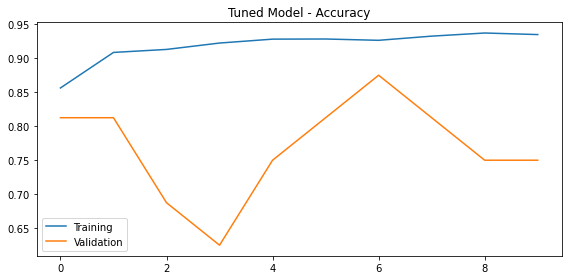

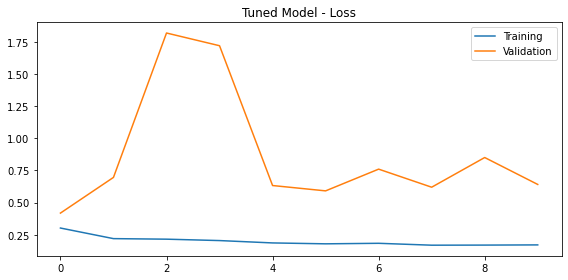

In [230]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range((len(acc)))

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True


fig1 = plt.figure()
plt.title('Tuned Model - Accuracy')
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()

fig2 = plt.figure()
plt.title('Tuned Model - Loss')
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.show()

20/20 [==============================] - 57s 3s/step


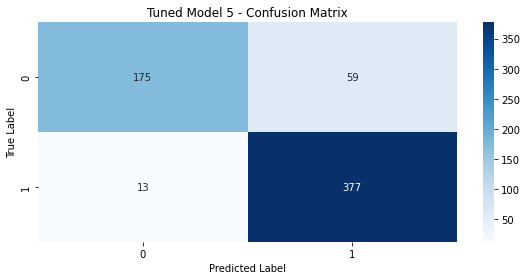

In [231]:
plot_confusion('Tuned Model '+ str(name_x) + ' - Confusion Matrix', 'tuning'+str(name_x)+'-conf')

In [232]:
#save info for later retrieval:

#model and history
model.save('./models/tuning_'+str(name_x))

#acc and loss charts
fig1.savefig('./img/tuning-'+str(name_x)+'acc.png')
fig2.savefig('./img/tuning-'+str(name_x)+'loss.png')

INFO:tensorflow:Assets written to: ./models/tuning_5\assets


INFO:tensorflow:Assets written to: ./models/tuning_5\assets



## Unfreezing Bottom Layer of VGG-19

Since we have already tuned the existing classifier to the frozen VGG base, we can unfreeze the deeper layers of the base and train the model more specifically to our dataset. First, we'll load the best performing fine tuned model so far:

In [233]:
model = keras.models.load_model('./models/tuning_2')

In [234]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_21 (Flatten)        (None, 8192)              0         
                                                                 
 dense_116 (Dense)           (None, 256)               2097408   
                                                                 
 dense_117 (Dense)           (None, 128)               32896     
                                                                 
 dense_118 (Dense)           (None, 64)                8256      
                                                                 
 dense_119 (Dense)           (None, 300)               19500     
                                                                 
 dense_120 (Dense)           (None, 200)             

This is the same model summary we've seen before, but this time we want to look at the vgg19 layer specifically, and see what pre-trained layers exist within it:

In [235]:
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

We can see that there are many layers within the vgg base layer. For the purposes of this project, we will unfreeze every layer in "block 5".

In [236]:
vgg_model.trainable = True
set_trainable = False
for layer in vgg_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Now that we have unfrozen these, we'll recompile and check to make sure that block 5 layers are now set to 'Trainable'.

In [237]:
#compile
model.compile(
    optimizer=optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=[my_metrics]
    )

#observe trainability for layers of vgg base
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_8 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_conv4 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_conv4 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_conv4 True
block5_pool True


### Training

In [240]:
#track time model takes
start = datetime.datetime.now()

history = model.fit(
    aug_train_data,
    epochs=10,
    validation_data=val_data,
    verbose=2
)

#display time taken
end = datetime.datetime.now()
print('Training Time: ',end-start)

Epoch 1/10
163/163 - 388s - loss: 0.1716 - binary_accuracy: 0.9314 - precision_3: 0.9589 - recall_3: 0.9482 - val_loss: 0.9783 - val_binary_accuracy: 0.7500 - val_precision_3: 0.6667 - val_recall_3: 1.0000 - 388s/epoch - 2s/step
Epoch 2/10
163/163 - 418s - loss: 0.1537 - binary_accuracy: 0.9402 - precision_3: 0.9609 - recall_3: 0.9585 - val_loss: 0.6464 - val_binary_accuracy: 0.6875 - val_precision_3: 0.6364 - val_recall_3: 0.8750 - 418s/epoch - 3s/step
Epoch 3/10
163/163 - 420s - loss: 0.1517 - binary_accuracy: 0.9415 - precision_3: 0.9612 - recall_3: 0.9600 - val_loss: 0.6691 - val_binary_accuracy: 0.7500 - val_precision_3: 0.6667 - val_recall_3: 1.0000 - 420s/epoch - 3s/step
Epoch 4/10
163/163 - 424s - loss: 0.1562 - binary_accuracy: 0.9398 - precision_3: 0.9614 - recall_3: 0.9574 - val_loss: 0.4951 - val_binary_accuracy: 0.7500 - val_precision_3: 0.6667 - val_recall_3: 1.0000 - 424s/epoch - 3s/step
Epoch 5/10
163/163 - 414s - loss: 0.1644 - binary_accuracy: 0.9360 - precision_3: 0.

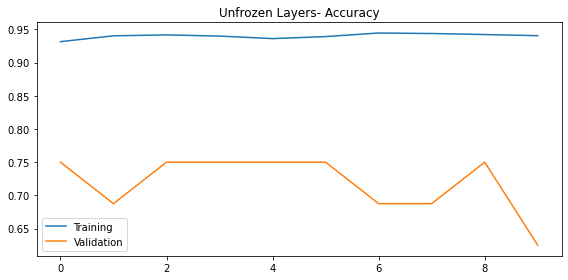

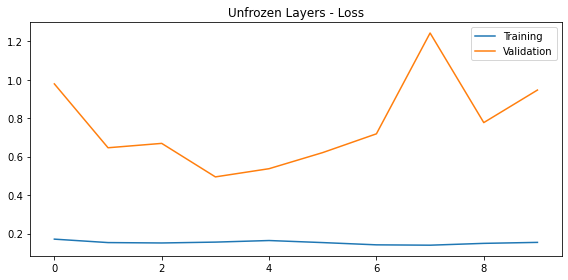

In [241]:
name_x = 'unfrozen_base'

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range((len(acc)))

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True


fig1 = plt.figure()
plt.title('Unfrozen Layers- Accuracy')
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.legend()

fig2 = plt.figure()
plt.title('Unfrozen Layers - Loss')
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.show()

20/20 [==============================] - 51s 2s/step


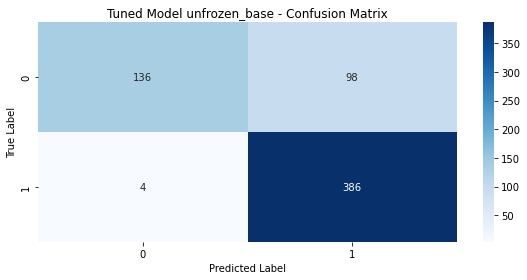

In [242]:
plot_confusion('Tuned Model '+ str(name_x) + ' - Confusion Matrix', 'tuning'+str(name_x)+'-conf')

In [243]:
#save info for later retrieval:

#model and history
model.save('./models/tuning_'+str(name_x))

#acc and loss charts
fig1.savefig('./img/tuning-'+str(name_x)+'acc.png')
fig2.savefig('./img/tuning-'+str(name_x)+'loss.png')

INFO:tensorflow:Assets written to: ./models/tuning_unfrozen_base\assets


INFO:tensorflow:Assets written to: ./models/tuning_unfrozen_base\assets


In [ ]:
# model_name = 'Final Model'

# df_model_scores = df_model_scores.append({'Model Name' : model_name, 'Accuracy' : test_acc, 'Loss' : test_loss, 'Precision' : test_prec, 'Recall' : test_rec},
#         ignore_index = True)

# df_model_scores.style.hide_index()

### Explanation of  Results

THe Unfrozen base model seems to have performed just a bit worse than the model it was based on, seemingly indicating that this is just about as __accurate__ as the model can get while __still maintaining low False Negatives__.

The main challenge in this instance is how to decide what amount of False Negatives is acceptable. When applied in a real world scenario, __each false negative could mean a potential life lost__. Some models in the course of this analysis yielded better accuracy scores, but at the cost of more potential lives lost. So the current model, albeit with 90 False Positives, is our best fit.

## Visualization of Model Behavior

Finally, we can create visualizations of what our model is interpreting in each image, and potentially be able to understand how this influences it's predictions.

We will use LIME (Local Interpretable Model-Agnostic Explanations) to create these visualizations.

In [17]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

explainer = lime_image.LimeImageExplainer()

In [18]:
#take first image from normal and pneumonia validation datasets
norm_samp = norm_imgs[0]
pneum_samp = pneum_imgs[0]

#lime image explainer on normal image
explanation = explainer.explain_instance(norm_samp.astype('double'), model.predict, top_labels=1, num_samples=500)

#image mask for normal image
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.0001)
norm_lime = mark_boundaries(temp, mask)

  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 65ms/step


In [19]:
#repeat all with pneumonia image
explanation = explainer.explain_instance(pneum_samp.astype('double'), model.predict, top_labels=1, num_samples=500)
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.0001)
pneum_lime = mark_boundaries(temp, mask)

  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 64ms/step


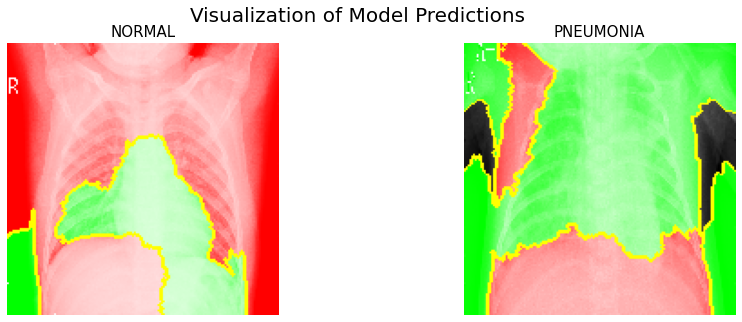

In [20]:
#show images

fig = plt.figure(figsize=(15, 5))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)

plt.imshow(norm_lime)
plt.axis('off')
plt.title("NORMAL", fontsize=15)

fig.add_subplot(rows, columns, 2)

plt.imshow(pneum_lime)
plt.axis('off')
plt.title("PNEUMONIA", fontsize=15)
fig.suptitle('Visualization of Model Predictions', fontsize=20);
fig.savefig('./img/00-lime_visualizations')

This gives us a very simplified look at just two examples of the final model in action. Above we can see two images, with their correct labels above them. Any __green__ on an image is our model's identification of an area that indicates a __positive__ result (PNEUMONIA). On the other hand, __red__ indicates __negative__ (NORMAL).

We can see that the sample NORMAL image shows a larger amount of red, while the sample PNEUMONIA image shows larger portions of green. This indicates pieces of these specific images that our model is using to identify cases with accuracy, in ways the human eye would be unable to.


***
***

# Conclusion

## Model Review

As stated earlier, the primary challenge when analyzing this data is to decide at what point a model's need for __accuracy__ outweighs it's need for __sensitivity(recall)__. This is because, to reiterate for a final time, _every False Negative our model predicts means a potential life lost to Pneumonia_. Our baseline model, technically, was trained well enough to prevent loss of life. A brief look again at it's confusion matrix reaffirms this:

<img src="./img/baseline.png" style="width: 500px;"/> 

This model __excels in sensitivity, but lacks greatly in accuracy__. With only _76 True Negatives_, the baseline model is functionally telling us that almost every x-ray (80% in this case) indicates the need for pneumonia treatment, which is not the case. By comparison, our final model:

<img src="./img/final-conf.png" style="width: 500px;"/> 

The final model __maintains extremely low False Positives__, but increases the accuracy greatly. This model can __much more accurately__ predict True cases of pneumonia, while also _keeping children safe from misdiagnosis_.






## Real World Application

The final model we have created could be deployed worldwide to save lives. The WHO estimates that __740,180 children died of Pnuemonia in 2019, and only _one third_ of those children had access to the health care they needed.__ 

In other words, __almost 500 thousand children died at least in part because they did not have proper access to diagnosis and care__.

_Médecins Sans Limites_ can help. Based on the success rate of this model, the existence of an organization providing accurate diagnosis, along with the __low cost, low tech medication and care__, could have led to __saving the lives of 483,000 children__ in 2019 alone.

The sooner we can create a system which can deliver necessary care to the parts of the world that need it, and include a Machine Learning model like this one, the more needless death can be prevented.



### Next Steps

This model seems to be ready for deployment in the medical fields where it is most needed. However, there are a few other steps that can be taken to supplement this success:

* Additional models could be investigated for similar instances to this one. For example, can we build a model that can accurately predict Pneumonia on other age groups, or perhaps even one model for *all* age groups?
* Additional data collection may help to further improve model performance, such as our currently slightly lacking precision score.
* The model could be adjusted to account for multiple classifications, such as other types of Pneumonia or other illnesses detectable in chest x-rays

***
***